In [29]:
import pandas as pd
import numpy as np 
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [30]:
#Read in the data
df = pd.read_csv('ETH_price.csv')
#set the data as the index
df = df.set_index( pd.DatetimeIndex(df[ 'Date' ].values))
#show the data
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
2020-04-16 00:00:00,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...,...,...
2016-05-09 17:00:00,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213
2016-05-09 16:00:00,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450
2016-05-09 15:00:00,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567
2016-05-09 14:00:00,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075


In [31]:
future_days=5

In [32]:
#create a new column
df[str(future_days)+'_Day_Price_Forecast'] = df[['Close']].shift(-future_days)
#show the data
df[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2020-04-16 00:00:00,150.39,157.10
2020-04-15 23:00:00,152.94,157.78
2020-04-15 22:00:00,155.81,157.48
2020-04-15 21:00:00,157.18,157.12
2020-04-15 20:00:00,158.04,155.81
...,...,...
2016-05-09 17:00:00,9.49,NaN
2016-05-09 16:00:00,9.83,NaN
2016-05-09 15:00:00,9.99,NaN
2016-05-09 14:00:00,10.00,NaN


In [33]:
X = np.array(df[['Close']])
X = X[ :df.shape[0] - future_days]
print(X)

[[150.39]
 [152.94]
 [155.81]
 ...
 [  9.97]
 [  9.99]
 [  9.36]]


In [59]:
y= np.array(df[str(future_days)+'_Day_Price_Forecast'])
y= y[:-future_days]
print(y)

[157.1  157.78 157.48 ...   9.99  10.     9.55]


In [60]:
#split the Data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [61]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [62]:
svr_rbf_confidence = svr_rbf.score(x_test,y_test)
print('svr_rbf accuracy:',svr_rbf_confidence)

svr_rbf accuracy: 0.998147591616053


In [63]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[ 180.13853186  381.52114366 1017.36439871 ...  169.04808271  197.55711261
  293.75625129]


In [64]:
print(y_test)

[ 179.66  374.11 1054.02 ...  176.36  191.38  289.42]


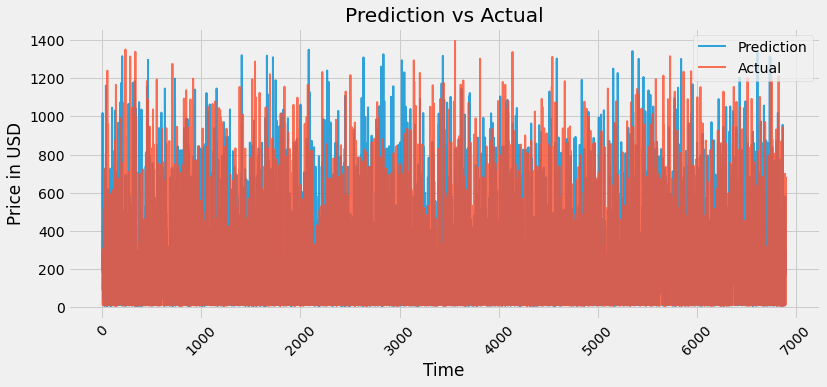

In [94]:
plt.figure(figsize=(12,5))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.8)
plt.plot(Y_test, label='Actual', lw=2, alpha=.8)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()